

> Representacion de un punto en 2D y su rotacion con matrix. Ademas, P. Escalar, Norma, P. Interno.



<Figure size 640x480 with 0 Axes>

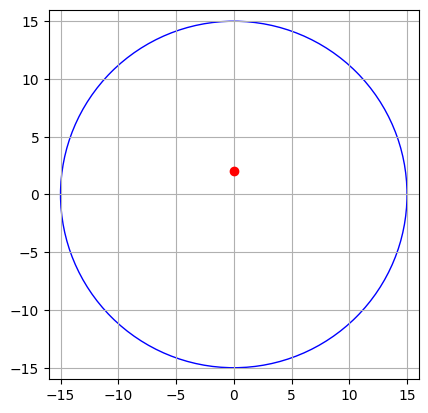

escalar: 2
norma: 4.0
producto interno: 12
rotar: 90 ° [-4.0000000e+00  2.4492936e-16]


<Figure size 640x480 with 0 Axes>

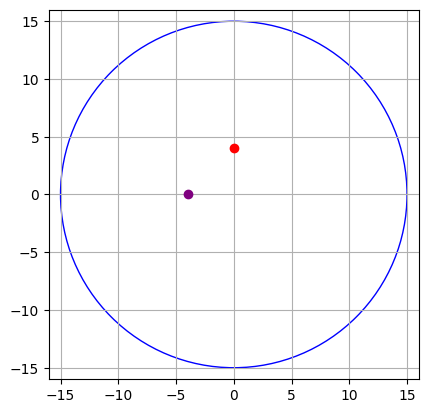

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Escena:
  def __init__(self, radio, color):
    self.radio = radio
    self.color = color
    self.punto = np.array([0, 0])
    self.puntorotar = self.punto

#Calculamos Escalar, Mostramos y retornamos su valor "return self.punto"
  def escalar(self, escalada):
    self.punto *= escalada
    print("escalar:", escalada)
    return self.punto
    self.dibujar_escena()

#Calculamos Norma con el vector del punto (self.punto), Mostramos en pantalla su valor
  def norma(self):
    resultado_norma = np.linalg.norm(self.punto)
    print("norma:", resultado_norma)

#Calculamos Producto Interno con el vector [3, 3] y el vector del Punto, Mostramos en pantalla su resultado
  def prod_int(self):
    self.punto2 = np.array([3, 3])
    producto_punto = np.dot(self.punto, self.punto2)
    print("producto interno:", producto_punto)

#Para hacer rotar el punto, utilizamos la matrix de rotacion y convertimos el angulo en radianes, se imprime los puntos a rotar y se retorna el valor para ser
#usado por "dibujar_escena"
  def rotar(self, angulo):
    angulo_rad = np.radians(angulo)
    matriz_rotacion = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad)],
                                [np.sin(angulo_rad), np.cos(angulo_rad)]])
    self.puntorotar = matriz_rotacion @ self.punto
    print("rotar:", angulo,"°", self.puntorotar)
    self.dibujar_escena(mostrar_rotacion=True)

#Crea la escena, el circulo y el punto, ademas, recibe los parametros para dibujar la ubicacion del punto
  def dibujar_escena(self, mostrar_rotacion=False):
    plt.clf()
    fig, ax = plt.subplots()
    ax.add_patch(plt.Circle((0, 0), self.radio, color=self.color, fill=False))
    plt.plot(*self.punto, 'ro')

    if mostrar_rotacion:
      plt.plot(*self.puntorotar, 'o', color='purple')

    ax.set_aspect('equal')
    ax.set_xlim(-self.radio-1, self.radio+1)
    ax.set_ylim(-self.radio-1, self.radio+1)
    plt.grid(True)
    plt.show()

#Mueve el punto segun datos que le demos, como direccion y distancia.
  def desplazar_punto(self, distancia, direccion):
    direcciones = {
        'arriba': np.array([0, distancia]),
        'abajo': np.array([0, -distancia]),
        'izquierda': np.array([-distancia, 0]),
        'derecha': np.array([distancia, 0])
    }
    if direccion in direcciones:
      self.punto +=direcciones[direccion]
      self.dibujar_escena()

escena = Escena(15, 'blue')
escena.desplazar_punto(2, 'arriba')
#escena.escalar toma el valor con el que realizara las operciones
escena.escalar(2)
escena.norma()
escena.prod_int()
#escena.rota toma el angulo en el se quiere rotar el punto
escena.rotar(90)
